# Volume 4: Introduction to Initial Value Problems and Boundary Value Problems

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use solve_ivp to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

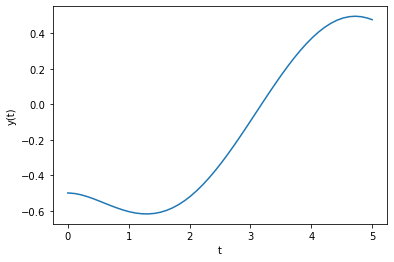

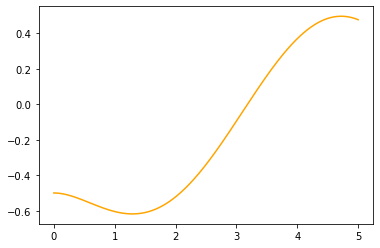

In [24]:
# element 1: the ODE function
def ode(t, y):
    '''defines the ode system'''
    return np.array([y[1],np.sin(t)+y[0]])

# element 2: the time domain
t_span = (0,5)

# element 3: the initial conditions
y0 = np.array([-1/2, 0])

# Solve the system
sol = solve_ivp(ode, t_span, y0, max_step=.1)
plt.plot(sol.t,sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

# Plot solution
x = np.linspace(0,5,500)
y = (-1/2) * (np.exp(-1*x) + np.sin(x)) 
plt.plot(x,y, "orange")
plt.show()

### Problem 2

Use solve_bvp to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

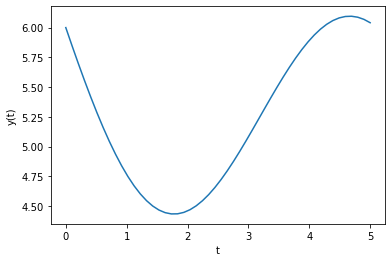

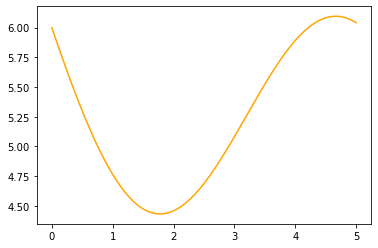

In [34]:
# element 1: the ODE function
def ode(t, y):
    '''defines the ode system'''
    return np.array([y[1],-1*y[1] - (1/4)*np.exp(-.5*t) - np.cos(t) + np.sin(t)])

# element 2: the boundary condition function
def bc(ya,yb):
    ''' define the boundary conditions '''
    # ya are the initial values
    # yb are the final values
    # each entry of the return array will be set to zero
    return np.array([ya[0]-6, yb[1]+.324705])
"""
ya[0]-x would indicate that we know y(a)=x
ya[1]-x would indicate that we know y`(a)=x,
yb[0]-x would indicate that we know y(b)=x
yb[1]-x would indicate that we know y`(b)=x

y(a) = -.5             =>     ya[0]+.5
y`(b) = -.324705              =>     ya[1]
"""    
    
# element 3: the time domain.
t_steps = 50
t = np.linspace(0,5,t_steps)

# element 4: the initial guess.
y0 = np.ones((2,t_steps))

# Solve the system
sol = solve_bvp(ode, bc, t, y0)
plt.plot(sol.x, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

# Plot solution
x = np.linspace(0,5,500)
y = np.exp((-1/2)*x) - np.sin(x) + 5
plt.plot(x,y, "orange")
plt.show()

### Problem 3

Use solve_bvp to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

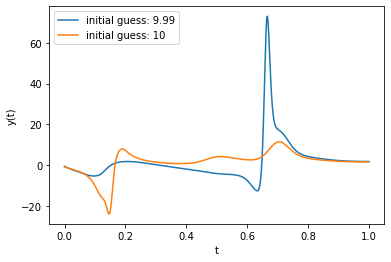

In [37]:
# element 1: the ODE function
def ode(t, y):
    '''defines the ode system'''
    return np.array([y[1], (1 - y[1]) * 10 * y[0]])

# element 2: the boundary condition function
def bc(ya,yb):
    ''' define the boundary conditions '''
    # ya are the initial values
    # yb are the final values
    # each entry of the return array will be set to zero
    return np.array([ya[0]+1, yb[0]-1.5])
"""
ya[0]-x would indicate that we know y(a)=x
ya[1]-x would indicate that we know y`(a)=x,
yb[0]-x would indicate that we know y(b)=x
yb[1]-x would indicate that we know y`(b)=x

y(a) = -.5             =>     ya[0]+.5
y`(b) = -.324705              =>     ya[1]
"""    
    
# element 3: the time domain.
t_steps = 50
t = np.linspace(0,1,t_steps)

# element 4: the initial guess.
y0 = np.ones((2,t_steps)) * 10
y0_9 = np.ones((2,t_steps)) * 9.99

# Solve the system
sol_9 = solve_bvp(ode, bc, t, y0_9)
plt.plot(sol_9.x, sol_9.y[0], label='initial guess: 9.99')
sol = solve_bvp(ode, bc, t, y0)
plt.plot(sol.x, sol.y[0], label='initial guess: 10')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# Solve the system


### Problem 4
Use solve_ivp to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

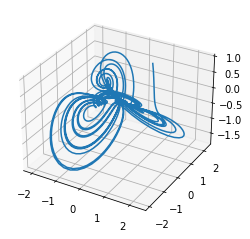

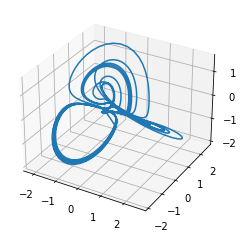

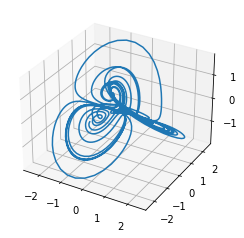

In [67]:
# element 1: the ODE function
def ode(t, y):
    '''defines the ode system'''
    a = .2
    b = .01
    c = -.4
    return np.array([a*y[0] + y[1]*y[2], 
                     b*y[0] + c*y[1] - y[0]*y[2], 
                     -1*y[2] - (y[0] * y[1])])

# element 2: the time domain
t_span = (0,500)

# element 3: the initial condition
y0_1 = np.array([1,1,1])
y0_2 = np.array([0,.5,-1])
y0_3 = np.array([-1,-.5,-.5])

# Solve the equations
sol_1 = solve_ivp(ode, t_span, y0_1, max_step=.1)
sol_2 = solve_ivp(ode, t_span, y0_2, max_step=.1)
sol_3 = solve_ivp(ode, t_span, y0_3, max_step=.1)


# Plot the three figures
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot(sol_1.y[0], sol_1.y[1], sol_1.y[2])
plt.show()

fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot(sol_2.y[0], sol_2.y[1], sol_2.y[2])
plt.show()

fig = plt.figure()
ax3 = fig.add_subplot(111, projection='3d')
ax3.plot(sol_3.y[0], sol_3.y[1], sol_3.y[2])
plt.show()